<a href="https://colab.research.google.com/github/alerosenberg/rais_ale/blob/main/MODELO_RAIS_BQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#STEP-1: Import libraries
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from google.colab import files
from oauth2client.client import GoogleCredentials
import glob
#STEP-2: Autheticate E-Mail ID
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
import pandas as pd

In [ ]:
# Enable data table display
# https://colab.research.google.com/notebooks/bigquery.ipynb#scrollTo=UMKGkkZEPVRu
# %load_ext google.colab.data_table
# %unload_ext google.colab.data_table

In [ ]:
# Display query output immediately

%%bigquery --project aledados
SELECT 
  COUNT(*) as total_rows
FROM `bigquery-public-data.samples.gsod`

,total_rows
0,114420316


In [ ]:
# Save output in a variable `df`

# %%bigquery --project aledados df
# SELECT 
#   COUNT(*) as total_rows
# FROM `bigquery-public-data.samples.gsod`

In [ ]:
project_id = 'aledados'

In [ ]:
from google.cloud import bigquery

# client = bigquery.Client(project=project_id)

# sample_count = 2000
# row_count = client.query('''
#   SELECT 
#     COUNT(*) as total
#   FROM `bigquery-public-data.samples.gsod`''').to_dataframe().total[0]

# df = client.query('''
#   SELECT
#     *
#   FROM
#     `bigquery-public-data.samples.gsod`
#   WHERE RAND() < %d/%d
# ''' % (sample_count, row_count)).to_dataframe()

# print('Full dataset has %d rows' % row_count)

# df.describe()

In [ ]:

# sample_count = 2000
# df = pd.io.gbq.read_gbq('''
#   SELECT name, SUM(number) as count
#   FROM `bigquery-public-data.usa_names.usa_1910_2013`
#   WHERE state = 'TX'
#   GROUP BY name
#   ORDER BY count DESC
#   LIMIT 100
# ''', project_id=project_id, dialect='standard')

# df.head()

In [ ]:
df_estab = pd.io.gbq.read_gbq('''
Select 
ano,
cnae_2,
indicador_simples,
id_municipio_6,
count(*) as qtd_empresas
 from `basedosdados.br_me_rais.microdados_estabelecimentos`
where sigla_uf in ('SP')
and ano between 2006 and 2019
and indicador_rais_negativa = 0
and cnae_2 <> '00000-1'
group by 1,2,3,4
  # LIMIT 100
''', project_id='aledados')

In [ ]:
# df_estab.head()
df_estab.count()

ano                  1503011
cnae_2               1503011
indicador_simples    1503011
id_municipio_6       1503011
qtd_empresas         1503011
dtype: int64

In [ ]:
df_estab1 = pd.io.gbq.read_gbq('''
Select 
ano,
cnae_1,
indicador_simples,
id_municipio_6,
count(*) as qtd_empresas
 from `basedosdados.br_me_rais.microdados_estabelecimentos`
where sigla_uf in ('SP')
and ano between 2000 and 2005
and indicador_rais_negativa = 0
group by 1,2,3,4
  # LIMIT 100
''', project_id='aledados')

In [ ]:
df_estab1.head()
# df_estab1.count()

,ano,cnae_1,indicador_simples,id_municipio_6,qtd_empresas
0,2002,01503,0,350010,116
1,2002,60240,1,350010,2
2,2002,52493,1,350010,57
3,2002,52442,1,350010,19
4,2002,74993,0,350010,5


In [ ]:
df_vinc = pd.io.gbq.read_gbq('''
Select 
ano,
cnae_2,
indicador_simples,
id_municipio_6,
avg(valor_remun_media_nominal) as rem_med,
count(vinculo_ativo_3112) as empregados_ativos
from `basedosdados.br_me_rais.microdados_vinculos`
where sigla_uf in ('SP')
and ano between 2006 and 2019
and vinculo_ativo_3112 > 0 and valor_remun_media_nominal > 0
and cnae_2 <> '00000-1'
group by 1,2,3,4
  # LIMIT 100
''', project_id='aledados')

In [ ]:
# df_vinc.head()
# df_vinc.count()

,ano,cnae_2,indicador_simples,id_municipio_6,rem_med,empregados_ativos
0,2015,41204,0,355030,2644.501423,72207
1,2015,56112,0,355030,1525.051005,62494
2,2015,85139,1,355030,1911.027581,19177
3,2015,45200,1,355030,1652.977156,12615
4,2015,81125,0,355030,2364.260472,96262


In [ ]:
df_vinc1 = pd.io.gbq.read_gbq('''
Select 
ano,
cnae_1,
indicador_simples,
id_municipio_6,
avg(valor_remun_media_nominal) as rem_med,
count(vinculo_ativo_3112) as empregados_ativos
from `basedosdados.br_me_rais.microdados_vinculos`
where sigla_uf in ('SP')
and ano between 2000 and 2003
and vinculo_ativo_3112 > 0 and valor_remun_media_nominal > 0
group by 1,2,3,4
  # LIMIT 100
''', project_id='aledados')

In [ ]:
# df_vinc1.head()
# df_vinc1.count()

ano                  272597
cnae_1               272597
indicador_simples    216130
id_municipio_6       272597
rem_med              272597
empregados_ativos    272597
dtype: int64

In [ ]:
df_vinc11 = pd.io.gbq.read_gbq('''
Select 
ano,
cnae_1,
indicador_simples,
id_municipio_6,
avg(valor_remun_media_nominal) as rem_med,
count(vinculo_ativo_3112) as empregados_ativos
from `basedosdados.br_me_rais.microdados_vinculos`
where sigla_uf in ('SP')
and ano between 2004 and 2005
and vinculo_ativo_3112 > 0 and valor_remun_media_nominal > 0
group by 1,2,3,4
  # LIMIT 100
''', project_id='aledados')

In [ ]:
result = pd.merge(df_estab, df_vinc, how="left", on=["ano","cnae_2","indicador_simples","id_municipio_6"])

In [ ]:
df_vinc1f = pd.concat([df_vinc1, df_vinc11])

In [ ]:
result1 = pd.merge(df_estab1, df_vinc1f, how="left", on=["ano","cnae_1","indicador_simples","id_municipio_6"])

In [ ]:
import numpy as np 
result['rem_med_log'] = np.log(result['rem_med']) 
result['empregados_ativos_log'] = np.log(result['empregados_ativos']) 
result['rem_med_log'] = np.log(result['qtd_empresas'])

In [ ]:
result1['rem_med_log'] = np.log(result1['rem_med']) 
result1['empregados_ativos_log'] = np.log(result1['empregados_ativos']) 
result1['rem_med_log'] = np.log(result1['qtd_empresas']) 

In [ ]:
result.head()
# result.count()

,ano,cnae_2,indicador_simples,id_municipio_6,qtd_empresas,rem_med,empregados_ativos,rem_med_log,empregados_ativos_log,qtd_empresas_log
0,2006,47555,1,350010,12,462.994000,20.0,6.137714,2.995732,2.484907
1,2006,47547,1,350010,9,539.327200,25.0,6.290322,3.218876,2.197225
2,2006,94308,0,350010,8,504.611310,145.0,6.223788,4.976734,2.079442
3,2006,86305,0,350010,39,425.634500,40.0,6.053581,3.688879,3.663562
4,2006,45307,1,350010,42,601.771471,136.0,6.399878,4.912655,3.737670


In [ ]:
result1.head()
# result1.count()

In [ ]:
!pip install linearmodels
from linearmodels import PanelOLS

In [ ]:
file_id = '1dTGoL-B-8_prpCF4I7sbD7LcWueBx7bf'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('BASE_MODELO_FINAL.xlsx')

In [ ]:
!pip install -q xlrd
base_modelo = pd.read_excel('BASE_MODELO_FINAL.xlsx')
base_modelo.head()

,cnae_2,ano,DESC_CNAE2_5D,ATIVIDADE_CONTA_NACIONAL,DESC_ATIVIDADE,SETOR_COM_ST,ST_CNAE_CNAE,DUMMY_ST_CNAE,DUMMY_ST_PRE08,DUMMY_ST_POS08,SETOR,DUMMY_PRIMARIO,DUMMY_SECUNDARIO,DUMMY_TERCIARIO,PERC_ATIV_ST,O_ST,D_ST,DUMMY_MI_08
0,1113,2000,Cultivo de cereais,191,"Agricultura, inclusive o apoio à agricultura e...",1,SEM ST,0,0,0,Primário,1,0,0,0.21778,0.313344,0.795963,0
1,1121,2000,Cultivo de algodão herbáceo e de outras fibras...,191,"Agricultura, inclusive o apoio à agricultura e...",1,SEM ST,0,0,0,Primário,1,0,0,0.21778,0.313344,0.795963,0
2,1130,2000,Cultivo de cana-de-açúcar,191,"Agricultura, inclusive o apoio à agricultura e...",1,SEM ST,0,0,0,Primário,1,0,0,0.21778,0.313344,0.795963,0
3,1148,2000,Cultivo de fumo,191,"Agricultura, inclusive o apoio à agricultura e...",1,SEM ST,0,0,0,Primário,1,0,0,0.21778,0.313344,0.795963,0
4,1156,2000,Cultivo de soja,191,"Agricultura, inclusive o apoio à agricultura e...",1,SEM ST,0,0,0,Primário,1,0,0,0.21778,0.313344,0.795963,0


In [ ]:
file_id = '1AoUhBeM7E5kEpK2Pr54JTXgnCc3ov8Zm'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('CNAE_1_CNAE_2_final.xlsx')

In [ ]:
base_cnae1_cnae2 = pd.read_excel('CNAE_1_CNAE_2_final.xlsx')
base_cnae1_cnae2.head()

In [ ]:
result['ano']=result['ano'].astype(int)
result['cnae_2']=result['cnae_2'].astype(int)
result1['ano']=result['ano'].astype(int)
result1['cnae_1']=result['cnae_1'].astype(int)

In [ ]:
result_base = pd.merge(result, base_modelo, how="left", on=["ano","cnae_2"])

In [ ]:
result_base1 = pd.merge(result1, base_cnae1_cnae2, how="left", on=["cnae_1"])

In [ ]:
result_base1f = pd.merge(result_base1, base_modelo, how="left", on=["cnae_2"])

In [ ]:
result_base['cnae_2_municipio'] = result_base['cnae_2'].map(str)+df['id_municipio_6'].map(str)

In [ ]:
result_base1f['cnae_2_municipio'] = result_base1f['cnae_2'].map(str)+df['id_municipio_6'].map(str)

In [ ]:
result_base_completa = pd.concat([result_base1f, result_base])

In [ ]:
result_base_completa.head()


,ano,cnae_2,indicador_simples,id_municipio_6,qtd_empresas,rem_med,empregados_ativos,rem_med_log,empregados_ativos_log,qtd_empresas_log,DESC_CNAE2_5D,ATIVIDADE_CONTA_NACIONAL,DESC_ATIVIDADE,SETOR_COM_ST,ST_CNAE_CNAE,DUMMY_ST_CNAE,DUMMY_ST_PRE08,DUMMY_ST_POS08,SETOR,DUMMY_PRIMARIO,DUMMY_SECUNDARIO,DUMMY_TERCIARIO,PERC_ATIV_ST,O_ST,D_ST,DUMMY_MI_08,cnae_2_municipio
0,2006,47555,1,350010,12,462.994000,20.0,6.137714,2.995732,2.484907,Comércio varejista especializado de tecidos e ...,4680,"Comércio por atacado e a varejo, exceto veícul...",0,SEM ST,0,0,0,Terciário,0,0,1,0.0,0.154965,0.451458,0,47555350010
1,2006,47547,1,350010,9,539.327200,25.0,6.290322,3.218876,2.197225,"Comércio varejista especializado de móveis, co...",4680,"Comércio por atacado e a varejo, exceto veícul...",0,SEM ST,0,0,0,Terciário,0,0,1,0.0,0.154965,0.451458,0,47547350010
2,2006,94308,0,350010,8,504.611310,145.0,6.223788,4.976734,2.079442,Atividades de associações de defesa de direito...,9480,Organizações associativas e outros serviços pe...,0,SEM ST,0,0,0,Terciário,0,0,1,0.0,0.099661,0.153018,0,94308350010
3,2006,86305,0,350010,39,425.634500,40.0,6.053581,3.688879,3.663562,Atividades de atenção ambulatorial executadas ...,8691,Saúde pública,0,SEM ST,0,0,0,Terciário,0,0,1,0.0,0.172272,0.093667,0,86305350010
4,2006,45307,1,350010,42,601.771471,136.0,6.399878,4.912655,3.737670,Comércio de peças e acessórios para veículos a...,4500,Comércio e reparação de veículos automotores e...,0,SEM ST,0,0,0,Terciário,0,0,1,0.0,0.374791,0.402052,0,45307350010


In [ ]:
df1 = result_base_completa[result_base_completa.SETOR_COM_ST.isin([1])]
df1.count()
df1.head()

,ano,cnae_2,indicador_simples,id_municipio_6,qtd_empresas,rem_med,empregados_ativos,rem_med_log,empregados_ativos_log,qtd_empresas_log,DESC_CNAE2_5D,ATIVIDADE_CONTA_NACIONAL,DESC_ATIVIDADE,SETOR_COM_ST,ST_CNAE_CNAE,DUMMY_ST_CNAE,DUMMY_ST_PRE08,DUMMY_ST_POS08,SETOR,DUMMY_PRIMARIO,DUMMY_SECUNDARIO,DUMMY_TERCIARIO,PERC_ATIV_ST,O_ST,D_ST,DUMMY_MI_08,cnae_2_municipio
8,2006,23427,1,350010,1,515.630000,4.0,6.245389,1.386294,0.000000,Fabricação de produtos cerâmicos não-refratári...,2300,Fabricação de produtos de minerais não-metálicos,1,PÓS 2008,1,0,1,Secundário,0,1,0,0.884527,0.367020,0.219605,0,23427350010
10,2006,1512,0,350010,121,505.574322,118.0,6.225695,4.770685,4.795791,Criação de bovinos,192,"Pecuária, inclusive o apoio à pecuária",1,PÓS 2008,1,0,1,Primário,1,0,0,0.859273,0.524527,0.935732,0,1512350010
23,2006,31012,1,350010,12,569.338627,51.0,6.344475,3.931826,2.484907,Fabricação de móveis com predominância de madeira,3180,Fabricação de móveis e de produtos de indústri...,1,SEM ST,0,0,0,Secundário,0,1,0,0.158962,0.329489,0.150950,0,31012350010
26,2006,1610,1,350010,4,630.193333,12.0,6.446027,2.484907,1.386294,Atividades de apoio à agricultura,191,"Agricultura, inclusive o apoio à agricultura e...",1,SEM ST,0,0,0,Primário,1,0,0,0.265037,0.436178,0.787496,0,1610350010
28,2006,1130,0,350010,8,1081.608167,311.0,6.986204,5.739793,2.079442,Cultivo de cana-de-açúcar,191,"Agricultura, inclusive o apoio à agricultura e...",1,SEM ST,0,0,0,Primário,1,0,0,0.265037,0.436178,0.787496,0,1130350010


In [ ]:
df2 = df1.set_index(['cnae_2_municipio','ano'])
df2.head()

cnae_2                      413654
indicador_simples           413654
id_municipio_6              413654
qtd_empresas                413654
rem_med                     393047
empregados_ativos           393047
rem_med_log                 393047
empregados_ativos_log       393047
qtd_empresas_log            413654
DESC_CNAE2_5D               413654
ATIVIDADE_CONTA_NACIONAL    413654
DESC_ATIVIDADE              413654
SETOR_COM_ST                413654
ST_CNAE_CNAE                413654
DUMMY_ST_CNAE               413654
DUMMY_ST_PRE08              413654
DUMMY_ST_POS08              413654
SETOR                       413654
DUMMY_PRIMARIO              413654
DUMMY_SECUNDARIO            413654
DUMMY_TERCIARIO             413654
PERC_ATIV_ST                413654
O_ST                        413654
D_ST                        413654
DUMMY_MI_08                 413654
dtype: int64

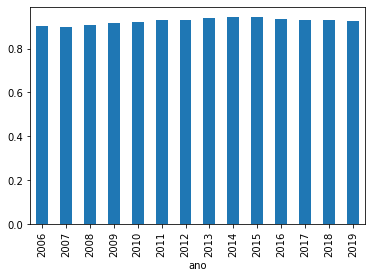

In [ ]:
dfst = result_base_completa[result_base_completa.DUMMY_ST_POS08.isin([0])]
dfst.groupby('ano')['qtd_empresas_log'].mean().plot.bar()

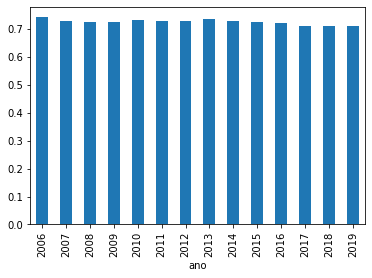

In [ ]:
dfst = result_base_completa[result_base_completa.DUMMY_ST_POS08.isin([1])]
dfst.groupby('ano')['qtd_empresas_log'].mean().plot.bar()

In [ ]:
# dependent variable = treated dummy + after intervention dummy + affected by * after dummy (+ other variables)
# QTD_EMPRESAS = DUMMY_ST_POS08 + DUMMY_08_09 + DUMMY_ST_POS08*DUMMY_MI_08

In [ ]:
df_modelo_setst = result_base_completa[result_base.SETOR_COM_ST.isin([1])]

# Chaves do modelo (tempo e variável)
df_modelo = result_base_completa.set_index(['cnae_2_municipio','ano'])
# df_modelo = df_modelo_setst.set_index(['cnae_2','ano'])

# Constante
df_modelo['const'] = 1

# Interação da variável de intervenção com a temporal (quando passou a estar vigente)
df_modelo['ST_INTERACAO'] = df_modelo['DUMMY_ST_POS08']*df_modelo['DUMMY_MI_08']
df_modelo['O_ST'] = df_modelo['O_ST']*df_modelo['DUMMY_MI_08']
df_modelo['D_ST'] = df_modelo['D_ST']*df_modelo['DUMMY_MI_08']

In [ ]:
# Variável dependente
# Y = df_modelo['empregados_ativos_log']
# ST_INTERACAO      -0.0814
# R-squared:                        0.0053

# Y = df_modelo['rem_med_log']
# ST_INTERACAO      -0.0134
# R-squared:                        0.1403

Y = df_modelo['qtd_empresas_log']
# ST_INTERACAO      -0.0394 
# R-squared:                        0.0038

# Variáveis do modelo de diferença em diferenças (cluster_entity=True) indica que os erros estão clusterizados por CNAE)
dd = ['const','DUMMY_ST_POS08','DUMMY_MI_08','ST_INTERACAO'
# ,'O_ST','D_ST'
]
dif_in_dif = PanelOLS(Y, df_modelo[dd]).fit(cov_type='clustered',cluster_entity=True)
print(dif_in_dif.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:       qtd_empresas_log   R-squared:                        0.0038
Estimator:                   PanelOLS   R-squared (Between):             -0.2240
No. Observations:             1503011   R-squared (Within):               0.0013
Date:                Tue, Mar 02 2021   R-squared (Overall):              0.0038
Time:                        02:58:52   Log-likelihood                -2.313e+06
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      1897.8
Entities:                      126804   P-value                           0.0000
Avg Obs:                       11.853   Distribution:               F(3,1503007)
Min Obs:                       1.0000                                           
Max Obs:                       28.000   F-statistic (robust):             212.29
                            